# Prendre en main l'API Python d'ArcGIS - épisode 4
## Créer une carte, y ajouter des couches, la publier et la partager

Dans ce quatrième tutoriel de le **[série de l'été consacrée à la prise en main de l'API Python d'ArcGIS](https://www.codethemap.fr/2024/05/prise-en-main-api-python-arcgis-intro.html)**, nous allons passer au deuxième volet de workflows réalisables avec l'API : la gestion de contenu. Cette semaine, nous commencerons par **apprendre à créer une carte, à y ajouter des couches, à la sauvegarder et à la partager**.  
Contrairement aux scripts précédents consacrés à l'administration et demandant de facto un compte avec des privilèges administrateur, ce tutoriel et les prochains ne nécessitent pas ces privilèges. Notez cependant qu'**un compte Creator ou supérieur sont nécessaires**.  
Vous pouvez exécuter ce Notebook directement dans ArcGIS Notebooks sur ArcGIS Online (disponible par défaut si votre administrateur vous a accordé les droits nécessaires), dans ArcGIS Enterprise (disponible avec [le rôle serveur correspondant](https://enterprise.arcgis.com/fr/notebook/)) ou en le téléchargeant et en l'ouvrant sur ArcGIS Pro (plus d'infos [dans la doc](https://pro.arcgis.com/fr/pro-app/latest/arcpy/get-started/pro-notebooks.htm)). Vous pouvez également l'exécuter dans n'importe quel environnement d'exécution de votre choix, mais veillez dans ce cas à [avoir installé les packages nécessaires](https://developers.arcgis.com/python/guide/anaconda/).

### 1/ Connection au GIS

Nous commençons par importer les différentes bibliothèques nécessaires, puis par nous connecter au SIG. 
Pour cela, nous importons l'objet [`GIS` du module `gis`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#gis), qui représente notre organisation. 
La connexion est ensuite à adapter selon votre environnement et votre méthode d'authentification. [Voir l'aide en ligne pour plus d'informations](https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/).  
Si vous êtes connectés en tant qu'admin, la cellule va vous renvoyer un message rouge pour vous prévenir qu'il faut faire attention aux opérations que vous utilisez. Cela n'empêche pas votre code de s'exécuter correctement.

In [2]:
from arcgis.gis import GIS
gis = GIS("home")

/opt/conda/lib/python3.11/site-packages/arcgis/gis/__init__.py:731: UserWarning: You are logged on as plouis_esrifrance with an administrator role, proceed with caution.
  warnings.warn(


#### Alternative pour la connexion si votre environnement n'est pas directement connecté à votre portail

In [ ]:
#à modifier avec vos propres informations d'authentification et l'url de votre portail
from arcgis.gis import GIS
gis =GIS(
url="https://url.devotre.org/portal",
username="nom_utilisateur",
password="motdepasse"
)

### 2/ Créer et paramétrer une carte

L'objet `GIS` inclut un widget de cartographie permettant d'afficher des cartes de manière interactive dans un Notebook, et de travailler avec. Pour pouvoir l'utiliser, il faut appeler la fonction [`gis.map()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.GIS.map) et l'assigner à une variable. Cela créée une instance de la classe [`MapView`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView) sur laquelle nous allons pouvoir travailler ensuite. Faire appel à la variable permet ensuite d'afficher une carte interactive directement dans le Notebook.

In [3]:
#création du widget de carte
carte = gis.map()
carte #appeler la variable permet d'afficher la carte interactivement

MapView(layout=Layout(height='400px', width='100%'))

#### Modifier le zoom et le centre

Il est possible d'accéder à différente propriété du widget de carte afin d'en modifier l'affichage. Par exemple ci-dessous, nous allons modifier le [`zoom`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView.zoom) et le centre ([`center`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView.center)) de la carte :

In [4]:
carte.zoom = 7
carte.center = [46.855,2.33]

Notez qu'il est possible de modifier ces propriétés directement au moment de la construction de la carte utilisant les paramètres de  [`gis.map()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.GIS.map), par exemple `carte2 = gis.map(location = [46.855,2.33],zoomlevel = 10)`

#### Changer la basemap

Nous allons également accéder à la propriété régissant le fond de carte. Pour savoir quels fonds de carte vous pouvez utiliser, il suffit d'interroger la propriété [`basemaps`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView.basemaps) qui renverra la liste de tous les fonds de carte disponibles :

In [5]:
carte.basemaps

['dark-gray-vector',
 'gray-vector',
 'hybrid',
 'oceans',
 'osm',
 'satellite',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo-vector',
 'arcgis-imagery',
 'arcgis-imagery-standard',
 'arcgis-imagery-labels',
 'arcgis-light-gray',
 'arcgis-dark-gray',
 'arcgis-navigation',
 'arcgis-navigation-night',
 'arcgis-streets',
 'arcgis-streets-night',
 'arcgis-streets-relief',
 'arcgis-topographic',
 'arcgis-oceans',
 'osm-standard',
 'osm-standard-relief',
 'osm-streets',
 'osm-streets-relief',
 'osm-light-gray',
 'osm-dark-gray',
 'arcgis-terrain',
 'arcgis-community',
 'arcgis-charted-territory',
 'arcgis-colored-pencil',
 'arcgis-nova',
 'arcgis-modern-antique',
 'arcgis-midcentury',
 'arcgis-newspaper',
 'arcgis-hillshade-light',
 'arcgis-hillshade-dark',
 'arcgis-human-geography',
 'arcgis-human-geography-dark']

Nous pouvons ensuite changer la valeur de la propriété [`basemap`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView.basemap) (attention, sans 's' à la fin cette fois-ci) de notre carte avec l'une des basemaps de la liste ci-dessus :

In [6]:
carte.basemap = 'dark-gray-vector'

Si vous retournez voir votre widget de carte au-dessus, vous verrez que le fond de carte a bien été modifié.

#### Et en 3D ?

Les fonctionnalités que nous venons de voir sont aussi disponibles avec les scènes 3D ! Pour cela, il faut utiliser le mode 3D, par exemple lors de l'instanciation de la carte :

In [10]:
carte_3D = gis.map('Paris', zoomlevel=2, mode="3D")
carte_3D

MapView(layout=Layout(height='400px', width='100%'), mode='3D')

Vous pouvez également passer de la 3D à la 2D une fois la carte construite en accédant à la propriété [`mode`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView.mode) du [`MapView`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView), par exemple : `carte.mode = '3D'`, ou encore le faire manuellement en cliquant sur le bouton de bascule entre les modes directement dans le widget de carte :  
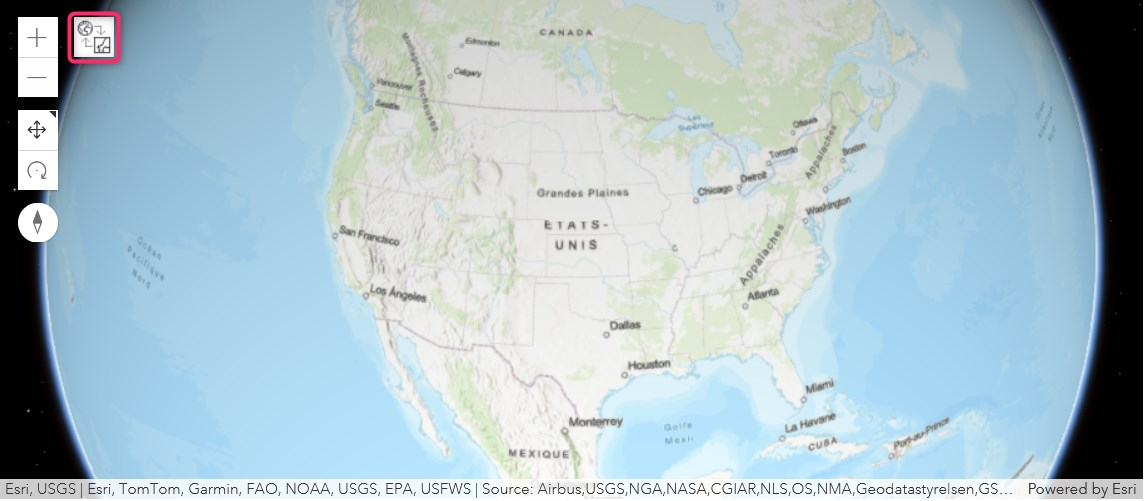

La 3D vous donne accès à deux paramètres supplémentaires pour le contrôle de la caméra : [`tilt`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView.tilt) et [`heading`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView.heading).

### 3/ Ajouter des couche

Nous allons maintenant voir comment ajouter des couches à notre carte.

#### Accéder à une collection de feature layer 

Pour cela, commençons à rechercher un feature layer. Pour cela, nous allons utiliser la méthode [`search()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.search) du [`ContentManager`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#contentmanager), qui nous permet de rechercher du contenu en le renvoyant sous la forme d'une liste d'item. Par défaut, la recherche du contenu se fait au sein de l'organisation.  
Pour trouver un item en particulier, vous pouvez vous baser sur une query, qui peut rechercher des items via leur nom, leur id, leur propriétaire, leur type, etc. Vous pouvez voir la liste complète des champs sur lesquels vous pouvez baser votre recherche en vous rendant dans [la section de la Search Reference dédiée aux items](https://developers.arcgis.com/rest/users-groups-and-items/search-reference/#item-fields) de la documentation.

Selon que vous soyez utilisateur ArcGIS Online ou ArcGIS Enterprise, nous n'allons pas faire exactement la même chose :
- Si vous êtes **utilisateur ArcGIS Online**, alors vous pouvez accéder à des items *dont le partage niveau de partage est public* hébergés en dehors de votre organisation en utilisant le le paramètre `outside_org=True`. Accédez à l'item dont l'identifiant est *726e437f738349729d021d1cfb40a813* publié par Esri France comme dans la cellule ci-dessous. Cet item contient les séismes historiques et récentes sur la France entière.
- Si vous êtes **utilisateurs ArcGIS Enterprise**, alors vous ne pourrez pas accéder à des items publiés en dehors de votre organisation, à moins d'une collaboration distribuée. Dans ce cas, accédez à un feature layer que vous possédez déjà, et qui possède plusieurs couches si possible. Utilisez pour cela la partie commentée de la cellule ci-dessous, en requêtant sur le titre (title) de votre feature layer (et pensez à supprimer la partie consacrée aux utilisateurs Online).

In [11]:
#utilisateur ArcGIS Online
recherche_item = gis.content.search(query= "id:726e437f738349729d021d1cfb40a813", outside_org=True)
recherche_item

#utilisateur ArcGIS Enterprise
#recherche_item = gis.content.search(query= "title:nom de mon feature layer") #changez le nom du FL dans la requête en respectant la casse
#recherche_item

[<Item title:"Séismes historiques et récents (France entière)" type:Feature Layer Collection owner:Esri_France_Content>]

Vous constatez que `search()` renvoie bel et bien une liste. Pour accéder à l'item qui nous intéresse, nous récupérons le premier élément de la liste dans une nouvelle variable :

<Item title:"Séismes historiques et récents (France entière)" type:Feature Layer Collection owner:Esri_France_Content>
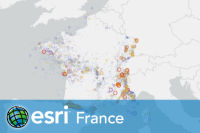

In [12]:
item_seismes = recherche_item[0]
item_seismes

Notez que si vous accédez à du contenu interne à votre organisation et dont vous connaissez l'identifiant, il est possible de récupérer directement l'item en utilisant la méthode [`get()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.get) du [`ContentManager`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#contentmanager), par exemple : `item_seismes = gis.content.get("726e437f738349729d021d1cfb40a813")`

#### Vérifier toutes les couches présentes dans le feature layer

L'item que nous que nous venons d'ajouter est de type [Feature Layer Collection](https://developers.arcgis.com/python/api-reference/arcgis.features.managers.html#arcgis.features.managers.FeatureLayerCollectionManager), et possède plusieurs couches. Il est possible d'y accéder via la propriété [`layers`](https://developers.arcgis.com/python/api-reference/arcgis.features.managers.html#arcgis.features.managers.FeatureLayerCollectionManager.layers).  
En itérant dans la liste des couches, nous pouvons accéder à son nom en appelant la propriété `name` accessible via la propriété [`properties`](https://developers.arcgis.com/python/api-reference/arcgis.features.managers.html#arcgis.features.managers.FeatureLayerCollectionManager.properties) :

In [13]:
for couche in item_seismes.layers :
    print(couche.properties.name)

Intensité des séismes entre 1950 et 2007 (France métropolitaine)
Séismes de magnitude >2 entre 1980 et 2023 (France métropolitaine)
Séismes de magnitude >2 entre 2018 et 2023 (La Réunion et Mayotte)
Séismes de magnitude >2 entre 2013 et 2023 (Les Antilles)


#### Accéder à une couche en particulier et l'ajouter à la carte

- Pour les utilisateurs ArcGIS Online, nous ajouterons à la carte uniquement la couche des séismes ayant eu lieu entre 1980 et 2023 en France métropolitaine, c'est-à-dire la deuxième couche du feature layer collection. Nous allons l'assigner à une nouvelle variable en y accédant en précisant son index (ici, 1 pour la deuxième couche car Python compte à partir de 0) lorsque nous appelons la propriété `layers` comme ci-dessous.
- Si vous êtes utilisateur ArcGIS Enterprise, vous pouvez accédez à la couche de votre choix en en précisant son index (par exemple, 1 pour la deuxième couche car Python compte à partir de 0) lorsque vous appelez la propriété `layers`. Assignez cette couche à une nouvelle variable comme ci-dessous.

In [14]:
couche_seismes_FM = item_seismes.layers[1]

Nous pouvons ensuite ajouter cette couche à la carte créée plus tôt, grâce à la méthode [`add_layer()`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView.add_layer) du [`MapView`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView).  
Notez ici que j'appelle une nouvelle fois ma carte, ce qui va créer une nouvelle carte interactive dans mon Notebook. Celle-ci pointe toujours sur la même instance de `MapView` que celle créée au tout début du Notebook, donc les deux cartes affichent exactement la même chose. En général, nous évitons d'afficher trop de fois la même carte dans le même Notebook pour ne pas le surcharger, mais je le fais ici par confort visuel pour que vous puissiez observer les changements facilement. 

In [15]:
carte.add_layer(couche_seismes_FM)
carte

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

#### Zoomer l'emprise de la carte à l'empreinte du feature layer

La carte ne possède pas forcément la bonne emprise pour voir la couche entière. J'utilise la méthode [`zoom_to_layer()`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView.zoom_to_layer) du `MapView` afin de modifier l'étdendue de la carte à l'empreinte de la couche :

In [16]:
carte.zoom_to_layer(couche_seismes_FM)

#### Accéder à un second feature layer

Comme tout à l'heure, nous allons accéder à un item de type Feature Layer Collection.
- Pour les **utilisateurs ArcGIS Online**, vous pouvez rechercher l'item dont l'identifiant est *a2910f64a47248beb3f280a0f323e4d5*, que j'ai publié sur mon organisation et partagé en public. Veillez à ce que le paramètre `outside_org` soit égal à `True`. Cet item contient les failles potentiellement actives ainsi que les centrales nucléaires de France métropolitaine, et une zone tampon de 50km autour de ces dernières.
- Pour les **utilisateurs ArcGIS Enterprise**, vous pouvez au choix ajouter un Feature Layer contenant plusieurs couches de la même manière que précédemment, ou bien si vous souhaitez travailler avec les mêmes données que moi, vous pouvez télécharger directement les données que j'ai utilisées depuis le [BDFA (Base de données des failles actives)](https://bdfa.irsn.fr/) et les publier sur votre portail en tant que couche d'entités hébergée pour les utiliser ci-dessous.

<Item title:"Failles potentiellement actives et installations nucléaires_WFL1" type:Feature Layer Collection owner:plouis_esrifrance>
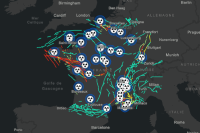

In [17]:
#utilisateur ArcGIS Online
recherche_item = gis.content.search(query= "id:a2910f64a47248beb3f280a0f323e4d5", outside_org=True)
item_failles_centrales = recherche_item[0]
item_failles_centrales

#utilisateur ArcGIS Enterprise
#recherche_item = gis.content.search(query= "title:nom de mon deuxième feature layer") #changez le nom du FL dans la requête en respectant la casse
#recherche_item

#### Itérer dans toutes les couches du feature layer et les ajouter à la carte

Nous allons à nouveau itérer parmi les couches de notre collection de feature layer en accédant à la propriété `layers`. Cette fois-ci, nous utiliseront directement la méthode `add_layer()` pour ajouter toutes les couches à notre carte.  
Notez qu'au lieu de parcourir mes couches dans leur ordre classique, je les parcoure en sens inverse grâce à la fonction `reversed()`. En réalité, dans la collection de Feature Layer, mes couches apparaissent dans l'ordre suivant : couche ponctuelle (centrales nucléaires), couche linéaire (failles) et couche surfacique (zone tampon de 50km autour des centrales), comme dans la plupart des carte pour éviter les problèmes de lecture. Hors, si j'ajoute mes données dans cet ordre à la carte, mes points vont se retrouver sous mes polygones. En parcourant la liste en sens inverse, j'ajoute ainsi mes données dans l'ordre polygone-lignes-points.

In [18]:
for couche in reversed(item_failles_centrales.layers) :
    carte.add_layer(couche)
    print(f"La couche '{couche.properties.name}' a été ajoutée à la carte.")

La couche 'Zone tampon de 50km' a été ajoutée à la carte.
La couche 'Failles' a été ajoutée à la carte.
La couche 'Installations nucléaires de base' a été ajoutée à la carte.


Vous pouvez aller jeter un coup d'oeil à la carte pour voir si vos couches se sont bien ajoutées, comme dans l'image ci-dessous :  
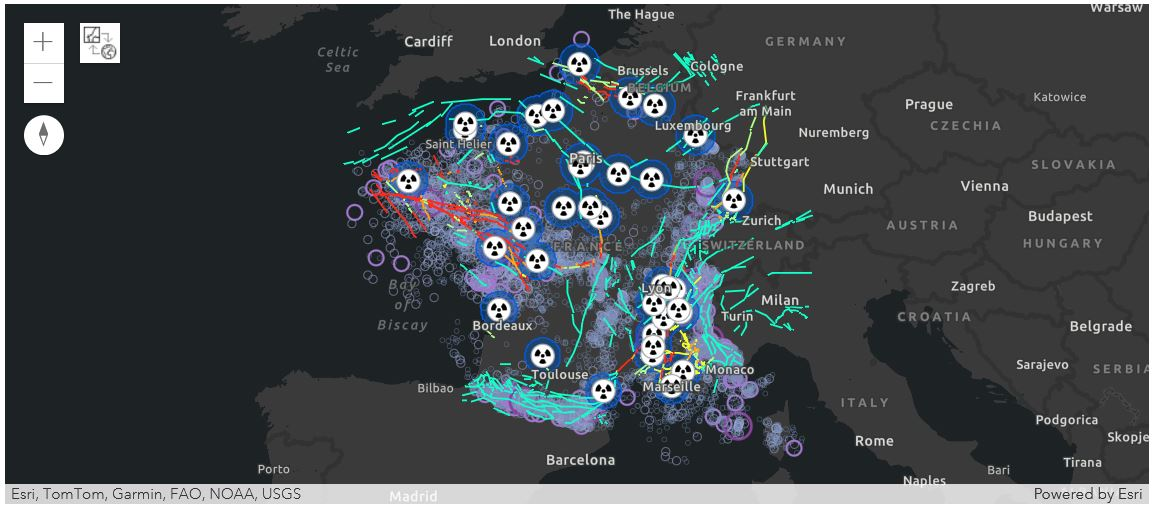

Notez qu'au lieu de parcourir ainsi les couches et les ajouter une par une, il est possible de passer directement l'item à la méthode `add_layer()`, par exemple ici `carte.add_layer(item_failles_centrales)`. Cependant, cela peut créer des problèmes de symbologie dans la visualisation de la carte, notamment si vos différentes couches n'ont pas la même géométrie.
Voici la liste des types de données que vous pouvez ajouter à la carte avec `add_layer()`, que ça soit en accédant aux couches ou à l'item: FeatureLayer, FeatureCollection, ImageryLayer et MapImageLayer.

### 4/ Supprimer une couche

#### Lister les couches de la carte

Je peux très facilement accéder à la liste des couches présentes dans ma carte grâce à la propriété [`layers`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView.layers) du [`MapView`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#mapview) :

In [19]:
carte.layers

[<FeatureLayer url:"https://services.arcgis.com/d3voDfTFbHOCRwVR/arcgis/rest/services/Séismes_historiques_et_récents__France_entière_/FeatureServer/2">,
 <FeatureLayer url:"https://services.arcgis.com/d3voDfTFbHOCRwVR/arcgis/rest/services/Failles_potentiellement_actives_et_installations_nucléaires_WFL1/FeatureServer/3">,
 <FeatureLayer url:"https://services.arcgis.com/d3voDfTFbHOCRwVR/arcgis/rest/services/Failles_potentiellement_actives_et_installations_nucléaires_WFL1/FeatureServer/2">,
 <FeatureLayer url:"https://services.arcgis.com/d3voDfTFbHOCRwVR/arcgis/rest/services/Failles_potentiellement_actives_et_installations_nucléaires_WFL1/FeatureServer/1">]

Comme tout à l'heure, nous allons itérer dans la liste des couches pour afficher leur nom en appelant la propriété name accessible via la propriété properties :

In [20]:
for couche in carte.layers :
    print(couche.properties.name) 

Séismes de magnitude >2 entre 1980 et 2023 (France métropolitaine)
Zone tampon de 50km
Failles
Installations nucléaires de base


#### Supprimer une couche spécifique

J'aimerais supprimer la couche contenant les zones tampons autour de mes centrales nucléaires, qui finalement ne me conviennent plus (si êtes utilisateur ArcGIS Enterprise et que vous utilisez vos propres feature layer, supprimez la couche de votre choix). Je vais pour cela utiliser la méthode [`remove_layers()`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView.remove_layers) sur ma carte, et je cible ici la deuxième couche de ma carte (celle qui contient les zones tampons si je me réfère à la liste ci-dessus) en utilisant l'index de la liste renvoyée par la propriété `layers`.

In [21]:
carte.remove_layers(layers = carte.layers[1])

True

### 5/ Publier la carte

Maintenant que la carte me convient, je peux la publier en tant que webmap sur mon organisation grâce à la méthode [`save()`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView.save) de la [`Mapview`](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#mapview).  
Pour cela, je crée dans un premier temps un dictionnaire qui va contenir les propriétés de ma carte : son nom, son résumé, ses tags... D'autres propriétés sont accessibles, vous pouvez consulter la liste complète [dans la documentation](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView.save).  
J'appelle ensuite la fonction `save()` sur ma carte en passant en paramètre le dictionnaire des propriétés tout en l'assignant à une variable.   
Je peux enfin appeler la variable qui me renvoie la webmap sauvegardée sur mon portail.

In [22]:
webmap_proprietes = {'title':'Carte des failles géologiques, séismes enregistrés entre 1980 et 2023 et installations nucléaires en France métropolitaine',
                    'snippet': "Widget de carte de Jupyter Notebook enregistré en tant que webmap avec l'API Python d'ArcGIS",
                    'tags':['automatisation', 'python','géologie','failles','séismes','centrale']}

webmap_item = carte.save(webmap_proprietes)
webmap_item

<Item title:"Carte des failles géologiques, séismes enregistrés entre 1980 et 2023 et installations nucléaires en France métropolitaine" type:Web Map owner:plouis_esrifrance>

### 6/ Modifier les paramètres de partage

Pour partager la webmap, j'utilise ici la nouvelle implémentation du [`SharingManager`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#sharingmanager), disponible depuis la version 2.3.0 de l'API. Si vous avez un doute sur la version de l'API que vous utilisez, vous pouvez exécuter le code suivant : `print(arcgis.__version__)`.  
Si vous utilisez une version antérieure à la 2.3.0, vous pouvez utiliser la méthode [`share()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.share) et la propriété [`shared_with`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.shared_with) de l'[`Item`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#item) comme montré dans les commentaires des cellules, mais notez que celle-ci est dépréciée en 2.3.0 et sera retirée à partir de la version 3.0.0 de l'API.

#### Partage dans un groupe

Nous allons commencer par partager la webmap dans un groupe. Nous pouvons obtenir la liste des groupes dans lesquels l'item est partagé de la manière suivante :

In [23]:
#à partir de la version 2.3.0, avec le SharingManager :
webmap_item.sharing.groups.list()

#versions antérieures :
#webmap_item.shared_with

[]

Pour l'instant, vous constatez que la webmap n'est pas partagée.  
Nous allons rechercher le groupe dans lequel nous voulons partager la webmap avec la méthode [`search()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Group.search) du [`GroupManager`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#groupmanager).  
Comme pour la recherche du contenu, nous allons utiliser une requête pour chercher le groupe de notre choix, cette fois-ci via le titre.  
Ici, je recherche un groupe que j'ai créé spécialement pour l'occasion dans mon organisation et que j'ai appelé *"Groupe partage API Python"*. Vous pouvez utiliser le groupe de votre choix dans votre organisation.  
A nouveau, `search()` renvoie une liste. Nous accédons donc au premier élément de cette liste pour accéder directement à notre groupe.

<Group title:"Groupe partage API Python" owner:plouis_esrifrance>
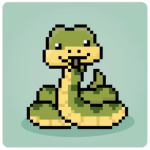

In [24]:
recherche_groupe = gis.groups.search("title: Groupe partage API Python") #changer par le nom de votre groupe
groupe_partage = recherche_groupe[0]
groupe_partage

Nous accédons au [`SharingManager`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#sharingmanager) en utilisant la propriété [`sharing`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.sharing) de l'[`Item`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#item). Pour les groupes, nous accédons ensuite à la propriété `groups` qui nous donne accès au [`SharingGroupManager`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#sharinggroupmanager), sur lequel nous pouvons utiliser la méthode `add()`. En paramètre de la fonction, nous passons le ou les groupes dans lesquels nous souhaitons ajouter notre carte :

In [25]:
#à partir de la version 2.3.0, avec le SharingManager :
webmap_item.sharing.groups.add(group=groupe_partage)

#versions antérieures :
#webmap_item.share(groups=[groupe_partage])

True

Nous pouvons réaccéder à la liste des groupes dans lequel notre item est partagé pour vérifier que tout a bien fonctionné :

In [26]:
webmap_item.sharing.groups.list()

[<Group title:"Groupe partage API Python" owner:plouis_esrifrance>]

#### Niveau de partage

Nous allons maintenant modifier le niveau de partage, qui peut être privé, au niveau de l'organisation ou public. Nous pouvons savoir quel est le niveau de partage actuel en accédant à la propriété [`sharing_level`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis._impl._content_manager.SharingManager.sharing_level) du `SharingManager` :

In [27]:
#à partir de la version 2.3.0, avec le SharingManager :
webmap_item.sharing.sharing_level

#pour les versions antérieures à la 2.3.0, il faut utiliser la propriété shared_with de la même manière que pour les groupes:
#webmap_item.shared_with 

<SharingLevel.PRIVATE: 'PRIVATE'>

Le niveau de partage de la webmap est actuellement privé. Je peux modifier la valeur de la propriété, en choisissant entre `PRIVATE` (accessible uniquement pour le propriétaire), `ORG` (accessible à tous les utilisateurs de mon organisation) et `EVERYONE` (public). Partageons ici à l'organisation :

In [30]:
#à partir de la version 2.3.0, avec le SharingManager :
webmap_item.sharing.sharing_level = "ORG"

#versions antérieures :
#webmap_item.share(org = True) #pour public, utiliser everyone = True en paramètre. Pour privé, il faut passer org et everyone à False.

Imprimons une fois de plus le niveau de partage pour vérifier que cela a bien fonctionné :

In [31]:
webmap_item.sharing.sharing_level

<SharingLevel.ORG: 'ORGANIZATION'>

C'est fini pour ajourd'hui ! Nous avons vu comment créer une carte de zéro en créant une nouvelle instance de carte et en l'enregistrant en tant que webmap dans notre portail.  
Dans le prochain tutoriel, nous verrons comment l'API peut aussi permettre d'accéder à des données existantes (webmap ou couche), les cloner et les mettre à jour. Ce type de workflow permet notamment de pousser de nouvelles données sur votre portail et de vous en servir pour mettre à jour vos couches et carte, en updatant automatiquement les applications dans lesquelles elles sont utilisées.